### Basic Information

angle_increase = 1.578897478 (degree)
one frame data = 228

### Problem



In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import icp


## data pre-process


### Read Data

In [36]:

df = pd.read_csv('laser_scan_data.csv',names=['time', 'angle', 'distance'])
df['drgee'] = np.degrees(df['angle']) # Radian to Degree
df['frame'] = (df['drgee'] < df['drgee'].shift()).cumsum() # Divide to different frame
df


,time,angle,distance,drgee,frame
0,1.709212e+09,0.008278,0.664,0.474267,0
1,1.709212e+09,0.035834,0.000,2.053164,0
2,1.709212e+09,0.063391,0.664,3.632062,0
3,1.709212e+09,0.090948,0.665,5.210959,0
4,1.709212e+09,0.118505,0.667,6.789857,0
...,...,...,...,...,...
100648,1.709213e+09,6.119144,2.875,350.601149,442
100649,1.709213e+09,6.146637,0.960,352.176342,442
100650,1.709213e+09,6.174129,0.939,353.751536,442
100651,1.709213e+09,6.201621,0.927,355.326729,442


### Transform Pole coordinates to Euclidean coordinates

In [37]:
# 用平均值填充distance=0的点
mask = df['distance'] == 0
df.loc[mask, 'distance'] = (df['distance'].shift(1) + df['distance'].shift(-1)) / 2

df['x'] = df['distance'] * np.cos(df['angle'])
df['y'] = df['distance'] * np.sin(df['angle'])

df

,time,angle,distance,drgee,frame,x,y
0,1.709212e+09,0.008278,0.664,0.474267,0,0.663977,0.005496
1,1.709212e+09,0.035834,0.664,2.053164,0,0.663574,0.023789
2,1.709212e+09,0.063391,0.664,3.632062,0,0.662666,0.042064
3,1.709212e+09,0.090948,0.665,5.210959,0,0.662252,0.060397
4,1.709212e+09,0.118505,0.667,6.789857,0,0.662322,0.078858
...,...,...,...,...,...,...,...
100648,1.709213e+09,6.119144,2.875,350.601149,442,2.836404,-0.469505
100649,1.709213e+09,6.146637,0.960,352.176342,442,0.951064,-0.130680
100650,1.709213e+09,6.174129,0.939,353.751536,442,0.933422,-0.102201
100651,1.709213e+09,6.201621,0.927,355.326729,442,0.923918,-0.075526


### Filter

In [38]:
# Delete far point
df = df[(df["distance"] < 4)]
# Median Filter
window_size = 5  # 窗口大小
df.loc[:, 'distance'] = df['distance'].rolling(window_size).median()
df

,time,angle,distance,drgee,frame,x,y
0,1.709212e+09,0.008278,NaN,0.474267,0,0.663977,0.005496
1,1.709212e+09,0.035834,NaN,2.053164,0,0.663574,0.023789
2,1.709212e+09,0.063391,NaN,3.632062,0,0.662666,0.042064
3,1.709212e+09,0.090948,NaN,5.210959,0,0.662252,0.060397
4,1.709212e+09,0.118505,0.664,6.789857,0,0.662322,0.078858
...,...,...,...,...,...,...,...
100648,1.709213e+09,6.119144,1.883,350.601149,442,2.836404,-0.469505
100649,1.709213e+09,6.146637,1.883,352.176342,442,0.951064,-0.130680
100650,1.709213e+09,6.174129,1.883,353.751536,442,0.933422,-0.102201
100651,1.709213e+09,6.201621,0.960,355.326729,442,0.923918,-0.075526


### Feature capture 

In [39]:
# from sklearn.cluster import KMeans

# # 创建KMeans聚类模型
# kmeans = KMeans(n_clusters=3)  # 指定聚类的数量

# # 提取特征并拟合模型
# features = df[['x', 'y']]  # 假设x和y是雷达数据中的空间坐标特征
# kmeans.fit(features)

# # 获取每个数据点的聚类标签
# labels = kmeans.labels_


# # 根据聚类标签标记离散点
# df.loc[:, 'label'] = labels

# # 统计每个聚类的数量
# cluster_counts = df['label'].value_counts()

# # 定义离散点的阈值，例如聚类数量小于某个阈值的认为是离散点
# threshold = 5

# # 根据阈值标记离散点
# df.loc[:, 'is_outlier'] = df['label'].apply(lambda x: True if cluster_counts[x] < threshold else False)

# # 删除标记为离散点的数据行
# df_filtered = df[df['is_outlier'] == False]

# df

### Save Data

In [40]:
df.to_csv('data_process.csv', index=False)

## Visualization
### Print 10 frame Lidar data


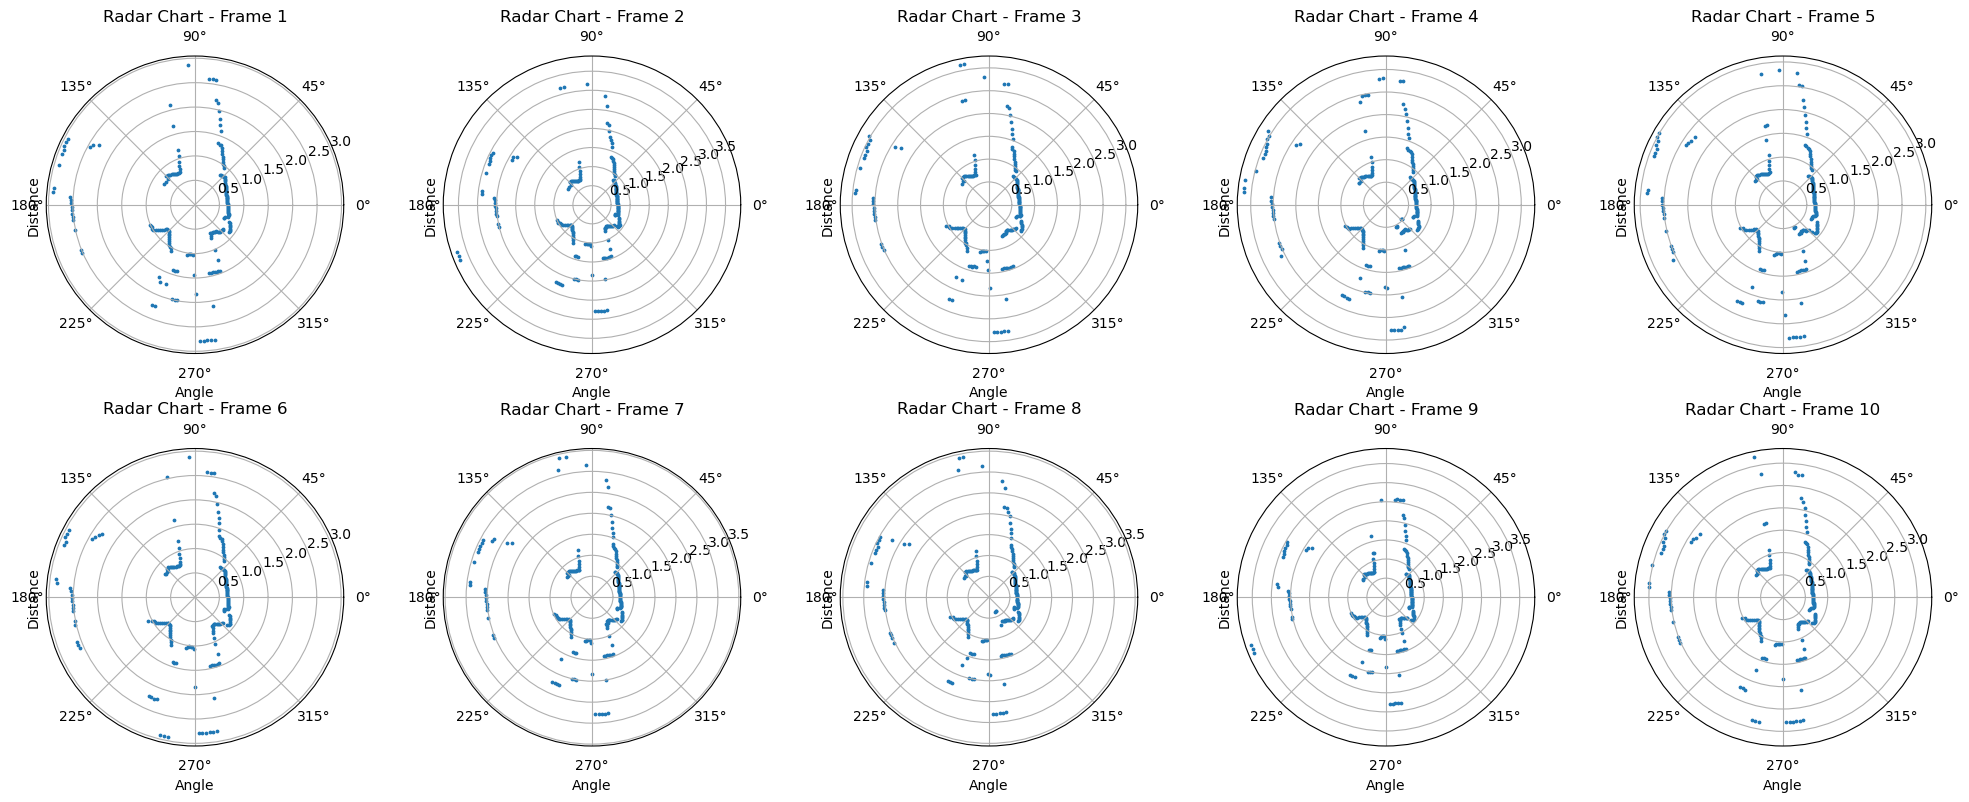

In [41]:
# 定义子图布局
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8), subplot_kw=dict(polar=True))

# 自定义起始帧
start_frame = 1

# 循环绘制多个雷达图
for frame_num in range(start_frame, start_frame + num_rows * num_cols):
    # 获取当前帧的数据
    frame_data = df[df['frame'] == frame_num]

    # 获取当前子图的坐标
    row_index = (frame_num - start_frame) // num_cols
    col_index = (frame_num - start_frame) % num_cols

    # 在指定的子图中绘制雷达图
    ax = axes[row_index, col_index]
    #ax.scatter(frame_data['x'], frame_data['y'],s=5)
    ax.scatter(frame_data["angle"], frame_data['distance'],s=3)

    # 设置雷达图的标题和标签
    ax.set_title(f'Radar Chart - Frame {frame_num}', fontsize=12)
    ax.set_xlabel('Angle', fontsize=10)
    ax.set_ylabel('Distance', fontsize=10)
    
# 调整子图之间的间距
plt.tight_layout()


## ICP

### Function

In [42]:
def T_to_angle(T):
    """
    x旋转矩阵变换
    """
    rotation_matrix = T[:2,:2]
    rotation_angle = np.arctan2(rotation_matrix[1, 0], rotation_matrix[0, 0])
    rotation_angle_degrees = np.degrees(rotation_angle)
    return rotation_angle_degrees

### Point Cloud Registration 
两组未知点的配准

In [43]:
select_frame1 = 4
select_frame2 = select_frame1 + 1

frame1_x = df[df['frame'] == select_frame1]['x']
frame1_y = df[df['frame'] == select_frame1]['y']
A = np.vstack((frame1_x,frame1_y)).T

frame2_x = df[df['frame'] == select_frame2]['x']
frame2_y = df[df['frame'] == select_frame2]['y']
B = np.vstack((frame2_x,frame2_y)).T

A_shape = A.shape
B_shape = B.shape
min_shape = np.minimum(A_shape, B_shape)
A = A[:min_shape[0], :min_shape[1]]
B = B[:min_shape[0], :min_shape[1]]

T, distances, i = icp.icp(B,A,max_iterations=200,tolerance=0.0000000000000001)
theta = T_to_angle(T)
t = T[:2,2] 
t_norm = np.linalg.norm(t)

t_norm,theta

distances

array([0.00587013, 0.00584626, 0.00582131, 0.00579528, 0.00578297,
       0.00613618, 0.00574504, 0.0057195 , 0.00664694, 0.00568449,
       0.00730279, 0.00731413, 0.0060987 , 0.00667282, 0.00609615,
       0.00668461, 0.00669806, 0.00611193, 0.00612134, 0.00818174,
       0.00675454, 0.00677511, 0.00617742, 0.00569136, 0.00911086,
       0.0057409 , 0.00760077, 0.00487044, 0.00590456, 0.00657125,
       0.00934123, 0.00858761, 0.01290874, 0.01478554, 0.0088083 ,
       0.01489499, 0.01495356, 0.01780702, 0.01421104, 0.01743697,
       0.02074898, 0.00841894, 0.00676623, 0.02200155, 0.02496166,
       0.02891643, 0.0319512 , 0.03598493, 0.01799817, 0.23475584,
       0.070278  , 0.01586057, 0.02869294, 0.42376919, 0.36110869,
       0.00805172, 0.29002756, 0.03716387, 0.03059961, 0.02659455,
       0.02417856, 0.02203286, 0.01810131, 0.01067365, 0.01061132,
       0.012534  , 0.01148077, 0.01539249, 0.01433572, 0.01427279,
       0.01619925, 0.01613626, 0.02104098, 0.01899589, 0.02239

### State Estimate

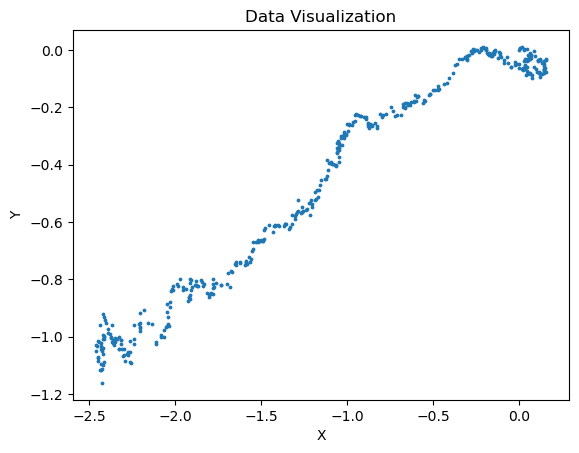

In [45]:
position = []
orign = np.array([0,0])
position.append(orign)

for frame_num in range(0,440):
    select_frame1 = frame_num
    select_frame2 = select_frame1 + 1

    frame1_x = df[df['frame'] == select_frame1]['x']
    frame1_y = df[df['frame'] == select_frame1]['y']
    A = np.vstack((frame1_x,frame1_y)).T

    frame2_x = df[df['frame'] == select_frame2]['x']
    frame2_y = df[df['frame'] == select_frame2]['y']
    B = np.vstack((frame2_x,frame2_y)).T

    min_shape = np.minimum(A.shape, B.shape)
    A = A[:min_shape[0], :min_shape[1]]
    B = B[:min_shape[0], :min_shape[1]]
        
    T, distances, i = icp.icp(B,A,max_iterations=200,tolerance=0.000000001)

    R = T[:2,:2]
    t = T[:2,2] 
    position_new = position[-1] @ R.T + t

    position.append(position_new)


x = [d[0] for d in position]
y = [d[1] for d in position]

plt.scatter(x, y,s=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Visualization')

plt.show()
